# Review with bank marketing data

## Introduction

- Data from the UCI Machine Learning Repository: [data](https://github.com/sinanuozdemir/sfdat22/blob/master/data/bank.csv), [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal:** Predict whether a customer will purchase a bank product marketed over the phone
- `bank.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [246]:
bank = pd.read_csv('../data/bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [247]:
bank.shape

(4119, 21)

In [248]:
# Do we have any null values?
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Step 2: Prepare at least three features

- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [249]:
# list all columns (for reference)
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing', u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign', u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'], dtype='object')

### y (response)

In [250]:
# convert the response to numeric values and store as a new column called "outcome"
bank['outcome'] = bank.y.map({'no':0, 'yes':1})
bank['outcome'].head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

Let's explore a few columns manually and visually

### age

In [251]:
# Exercise!
# create a boxplot that separates the data by outcome and graphs age
# TODO
print "\n"*20

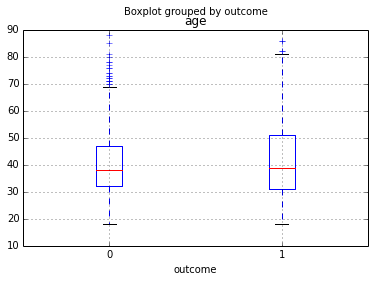

In [252]:
# Solution
bank.boxplot(column='age', by='outcome')
# probably not a great feature


### job

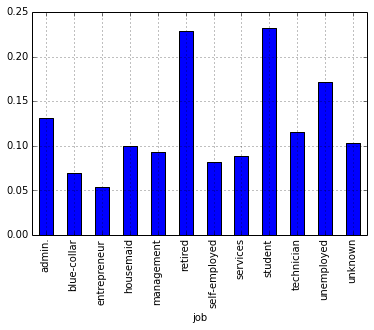

In [253]:
# looks like a useful feature
bank.groupby('job').outcome.mean().plot(kind='bar')
# Ask yourself, WHY is this going to be useful?

In [254]:
# create job_dummies (we will add it to the bank DataFrame later)
job_dummies = pd.get_dummies(bank.job, prefix='job')
# removing the first job from the list (making it k-1 columns) where k is the number of jobs
job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)
job_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


### default

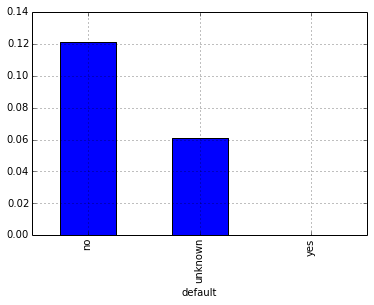

In [255]:
# looks like a useful feature
bank.groupby('default').outcome.mean().plot(kind='bar')

In [256]:
# Exercise! 
# How many people have a value of no, yes, and unknown?
# TODO
print "\n"*20

In [257]:
# Solution!
bank.default.value_counts()
# only one person in the dataset has a status of yes

no         3315
unknown     803
yes           1
dtype: int64

In [258]:
# So, let's treat this as a 2-class feature rather than a 3-class feature
bank['default'] = bank.default.map({'no':0, 'unknown':1, 'yes':1})
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome
0,30,blue-collar,married,basic.9y,0,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,0,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,0,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,0,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,0,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


### contact

In [259]:
# looks like a useful feature
bank.groupby('contact').outcome.mean()

contact
cellular     0.141403
telephone    0.051806
Name: outcome, dtype: float64

In [260]:
# Exercise! 
# Convert the feature to numeric values, 0 for cellular, 1 for telephone
# TODO
print "\n"*20

In [261]:
# Solution!
bank['contact'] = bank.contact.map({'cellular':0, 'telephone':1})

### month

In [262]:
# looks like a useful feature at first glance
bank.groupby('month').outcome.mean()

month
apr      0.167442
aug      0.100629
dec      0.545455
jul      0.082982
jun      0.128302
mar      0.583333
may      0.065312
nov      0.096413
oct      0.362319
sep      0.406250
Name: outcome, dtype: float64

In [263]:
# but, it looks like their success rate is actually just correlated with number of calls
# thus, the month feature is unlikely to generalize
bank.groupby('month').outcome.agg(['count', 'mean']).sort('count')

,count,mean
month,,
dec,22,0.545455
mar,48,0.583333
sep,64,0.406250
oct,69,0.362319
apr,215,0.167442
nov,446,0.096413
jun,530,0.128302
aug,636,0.100629
jul,711,0.082982


In [264]:
bank.groupby('month').outcome.agg(['count', 'mean']).sort('count').corr()

,count,mean
count,1.000000,-0.766364
mean,-0.766364,1.000000


### duration

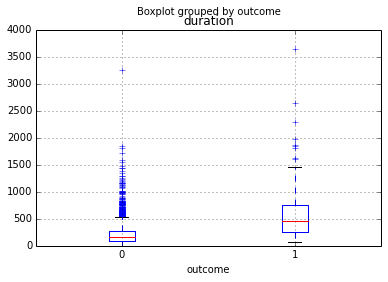

In [265]:
# looks like an excellent feature, can you think of a reason why duration isn't helpful in practice?
bank.boxplot(column='duration', by='outcome')

In [266]:
# Answer: You can't know the duration of a call beforehand, thus it can't be used in your model

### previous

In [267]:
# looks like a useful feature
bank.groupby('previous').outcome.mean()

previous
0           0.082884
1           0.208421
2           0.410256
3           0.600000
4           0.714286
5           1.000000
6           0.500000
Name: outcome, dtype: float64

### poutcome

In [268]:
# looks like a useful feature
bank.groupby('poutcome').outcome.mean()

poutcome
failure        0.147577
nonexistent    0.082884
success        0.647887
Name: outcome, dtype: float64

In [269]:
# create poutcome_dummies
poutcome_dummies = pd.get_dummies(bank.poutcome, prefix='poutcome')
poutcome_dummies.drop(poutcome_dummies.columns[0], axis=1, inplace=True)

In [270]:
# concatenate bank DataFrame with job_dummies and poutcome_dummies
bank = pd.concat([bank, job_dummies, poutcome_dummies], axis=1)

### euribor3m

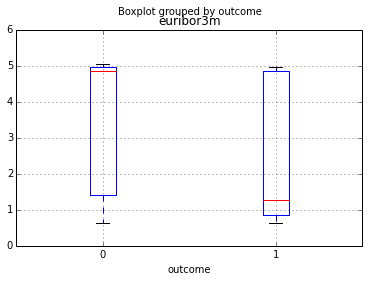

In [271]:
# looks like an excellent feature
bank.boxplot(column='euribor3m', by='outcome')

## Step 3: Model building

- Use cross-validation to evaluate the AUC of a logistic regression model with your chosen features
- Try to increase the AUC by selecting different sets of features

In [272]:
# new list of columns (including dummy columns)
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing', u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign', u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y', u'outcome', u'job_blue-collar', u'job_entrepreneur', u'job_housemaid', u'job_management', u'job_retired', u'job_self-employed', u'job_services', u'job_student', u'job_technician', u'job_unemployed', u'job_unknown', u'poutcome_nonexistent', u'poutcome_success'], dtype='object')

In [273]:
# create X (including 13 dummy columns)
feature_cols = ['default', 'contact', 'previous', 'euribor3m'] + list(bank.columns[-13:])
X = bank[feature_cols]

In [274]:
# create y
y = bank.outcome

In [275]:
# Exercise! 
# calculate cross-validated Accuracy for logisic regression, and knn with 5 neighbors
# TODO
print "\n"*20

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [277]:
# Solution!
logreg = LogisticRegression()
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.90215602496498293

In [278]:
knn = KNeighborsClassifier(5)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.90046229940191136

In [279]:
# Exercise! 
# use grid search to try k in range from 1-29 (odd only) for knn, and graph the accuracy from a cross val score vs the k
# TODO
print "\n"*20

In [280]:
# Solution!
from sklearn.grid_search import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 29, 2)}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

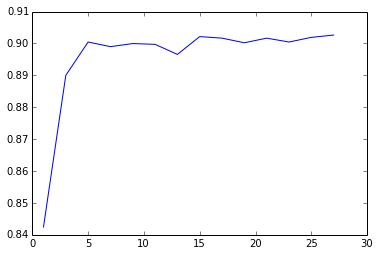

In [281]:
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(range(1, 29, 2), grid_mean_scores)

In [282]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=27, p=2, weights='uniform')

In [283]:
# look's like adding to k after 5 doesn't even help that much....

In [284]:
# Exercise! 
# Create a confusion matrix from the best estimator in the gridsearch and find the accuracy, sensitivity, and specificity
# TODO
print "\n"*20

In [285]:
# Solution! 
from sklearn import metrics
preds = grid.best_estimator_.predict(X)
print metrics.confusion_matrix(y, preds)
# Accuracy = (3625  + 100) / 4119  == .904
# Sensitivity = 100 / (100 + 351)  == .222
# Specificity = 3625 / (3625 + 43) == .988

[[3625   43]
 [ 351  100]]


In [286]:
# Exercise! 
# Compare the accuracy to the null accuracy rate
# TODO
print "\n"*20

In [287]:
# Solution!

null_accuracy_rate = bank['outcome'].value_counts()[0] / float(bank.shape[0])
# accuracy is greater than the null accuracy rate!

In [362]:
# What can we do to make the model better?

What is we want to regress to the duration of the call so the rep can better plan their day?

In [ ]:
u'age', u'job', u'marital', u'education', u'default', u'housing', u'loan'
, u'contact', u'month', u'day_of_week', u'duration', u'campaign', u'pdays', u'previous'
, u'poutcome', u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'

In [313]:
bank[['age', 'duration']].corr()
# age won't be useful

,age,duration
age,1.000000,0.041299
duration,0.041299,1.000000


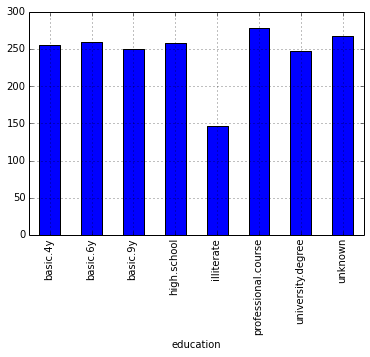

In [324]:
bank.groupby('education').duration.mean().plot(kind='bar')
# or education, except that illiterate column is interesting..

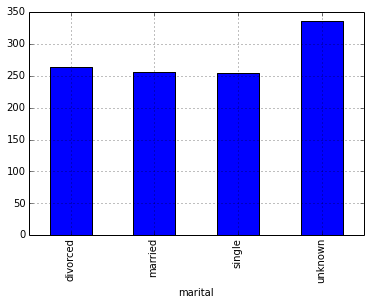

In [323]:
bank.groupby('marital').duration.mean().plot(kind='bar')
# or marital

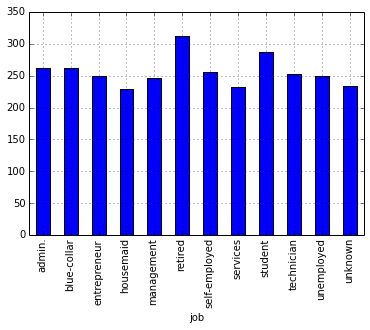

In [309]:
bank.groupby('job').duration.mean().plot(kind='bar')
# neither would job

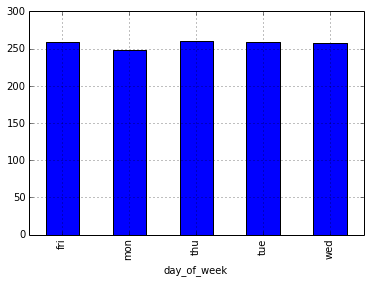

In [322]:
bank.groupby('day_of_week').duration.mean().plot(kind='bar')

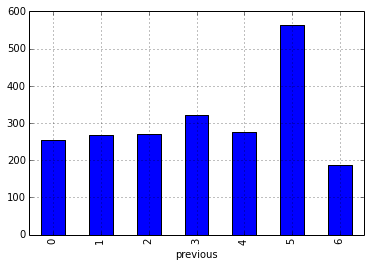

In [326]:
bank.groupby('previous').duration.mean().plot(kind='bar')

In [350]:
duration_response = bank['duration']

In [292]:
from sklearn.linear_model import LinearRegression

In [361]:
linreg = LinearRegression()
rmse = np.sqrt(abs(cross_val_score(linreg, X, duration_response, cv = 5, scoring='mean_squared_error').mean()))
rmse

255.17246331494044

In [349]:
# Barring some miracles, we aren't having a great time with this!
# But that's ok, not being able to predict something well still gives us insight..